In [27]:
import requests
import json
import collections
import pandas as pd
import spacy
%matplotlib inline

In [10]:
nlp = spacy.load('en_core_web_lg')

In [1]:
dublinersUrl = "https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis/gh-pages/_texts/dubliners.md"

In [4]:
dubliners = requests.get(dublinersUrl).text

In [6]:
dublinersStories = dubliners.split('\n## ')

In [7]:
len(dublinersStories)

16

In [8]:
[text[:20] for text in dublinersStories]

['---\nlayout: narrativ',
 'THE SISTERS\n\nTHERE w',
 'AN ENCOUNTER\n\nIT WAS',
 'ARABY\n\nNORTH RICHMON',
 'EVELINE\n\nSHE sat at ',
 'AFTER THE RACE\n\nTHE ',
 'TWO GALLANTS\n\nTHE gr',
 'THE BOARDING HOUSE\n\n',
 'A LITTLE CLOUD\n\nEIGH',
 'COUNTERPARTS\n\nTHE be',
 'CLAY\n\nTHE matron had',
 'A PAINFUL CASE\n\nMR. ',
 'IVY DAY IN THE COMMI',
 'A MOTHER\n\nMR HOLOHAN',
 'GRACE\n\nTWO GENTLEMEN',
 'THE DEAD\n\nLILY, the ']

In [11]:
dublinersDocs = [nlp(text) for text in dublinersStories]

In [13]:
eveline = dublinersDocs[4]

In [14]:
eveline[:30]

EVELINE

SHE sat at the window watching the evening invade the avenue. Her head
was leaned against the window curtains and in her nostrils was the odour

In [16]:
[(word.text, word.label_) for word in eveline.ents if word.label_ == 'PERSON']

[('Devines', 'PERSON'),
 ('Keogh', 'PERSON'),
 ('Ernest', 'PERSON'),
 ('Keogh', 'PERSON'),
 ('Tizzie Dunn', 'PERSON'),
 ('Margaret Mary Alacoque', 'PERSON'),
 ('Gavan', 'PERSON'),
 ('Hill', 'PERSON'),
 ('Hill', 'PERSON'),
 ('Eveline', 'PERSON'),
 ('Harry', 'PERSON'),
 ('Ernest', 'PERSON'),
 ('Ernest\n', 'PERSON'),
 ('Harry', 'PERSON'),
 ('Harry', 'PERSON'),
 ('Frank', 'PERSON'),
 ('Frank', 'PERSON'),
 ('Poppens', 'PERSON'),
 ('Frank', 'PERSON'),
 ('Harry', 'PERSON'),
 ('Ernest\n', 'PERSON'),
 ('Harry', 'PERSON'),
 ('Seraun', 'PERSON'),
 ('Frank', 'PERSON'),
 ('Frank', 'PERSON'),
 ('Frank', 'PERSON')]

In [23]:
frankSents = []
for sent in eveline.sents: 
    for word in sent: 
        if word.text == 'Frank': 
            frankSents.append(sent)

In [24]:
frankSents

[She was about to explore another life with Frank., Frank was very kind,
 manly, open-hearted., One day he had quarrelled with Frank and after that she had to meet her
 lover secretly.
 , Frank would save her., Frank would take her in his arms, fold her in his arms., If she went, tomorrow she would be on the sea
 with Frank, steaming towards Buenos Ayres.]

In [25]:
frankTest = nlp('Frank was very kind, manly, open-hearted.')

In [28]:
spacy.displacy.render(frankTest)

In [32]:
frankTestSent = list(frankTest.sents)[0]

In [33]:
frankTestSent.root

was

In [43]:
list(list(frankTestSent.root.children)[0].children)

[]

In [39]:
for word in frankTestSent: 
    if word.text == 'Frank':
        frankChildren = word.children
        for child in frankChildren:
            print(child)

In [40]:
list(frankChildren)

[]

In [44]:
frankSents

[She was about to explore another life with Frank., Frank was very kind,
 manly, open-hearted., One day he had quarrelled with Frank and after that she had to meet her
 lover secretly.
 , Frank would save her., Frank would take her in his arms, fold her in his arms., If she went, tomorrow she would be on the sea
 with Frank, steaming towards Buenos Ayres.]

In [45]:
frankAdj = []
for sent in frankSents: 
    for word in sent: 
        if word.pos_ == 'ADJ': 
            frankAdj.append(word.text)

In [46]:
frankAdj

['about', 'kind', 'manly', 'open', 'hearted']

In [49]:
listOfChars = set([(word.text) for word in eveline.ents if word.label_ == 'PERSON'])

In [51]:
'Frank' in frankTestSent.text

True

In [50]:
listOfChars

{'Devines',
 'Ernest',
 'Ernest\n',
 'Eveline',
 'Frank',
 'Gavan',
 'Harry',
 'Hill',
 'Keogh',
 'Margaret Mary Alacoque',
 'Poppens',
 'Seraun',
 'Tizzie Dunn'}

In [53]:
charAdjs = {}
for sent in eveline.sents:
    for char in listOfChars: 
        if char in sent.text:
            adjs = [word.text for word in sent if word.pos_ == 'ADJ']
            if char in charAdjs: 
                charAdjs[char] += adjs
            else: 
                charAdjs[char] = adjs

In [54]:
charAdjs

{'Devines': ['little'],
 'Keogh': ['little', 'little', 'nix'],
 'Ernest': ['dead', 'dead', 'favourite'],
 'Tizzie Dunn': ['dead'],
 'Margaret Mary Alacoque': ['broken', 'coloured'],
 'Gavan': ['glad'],
 'Hill': ['lively', 'alive'],
 'Eveline': [],
 'Harry': ['dead', 'entire', 'other'],
 'Ernest\n': ['dead', 'favourite'],
 'Frank': ['about', 'kind', 'manly', 'open', 'hearted'],
 'Poppens': [],
 'Seraun': ['foolish']}

In [57]:
spacy.displacy.render(frankSents, style='ent')

In [67]:
def extractTimesAndDates(doc):
    return [ent.lemma_ for ent in doc.ents if ent.label_ in ['TIME', 'DATE']]

In [68]:
extractTimesAndDates(eveline)

['evening',
 'nineteen',
 'Saturday',
 'night',
 'Saturday',
 'night',
 'Sunday',
 'a few week ago',
 'a day',
 'another day',
 'the last night',
 'tomorrow']

In [69]:
timesAndDates = [extractTimesAndDates(story) for story in dublinersDocs]

In [74]:
storyWords = {}
wordList = ['day', 'morning', 'noon', 'afternoon', 'evening', 'dusk', 'night']
for i, story in enumerate(timesAndDates):
    for word in wordList: 
        for storyWord in story: 
            if word in storyWord: 
                if i in storyWords: 
                    storyWords[i].append(word)
                else: 
                    storyWords[i] = [word]

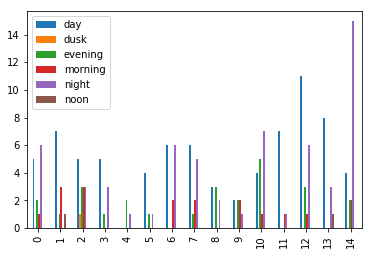

In [79]:
pd.DataFrame([collections.Counter(story) for i, story in storyWords.items()]).fillna(0).plot(kind='bar')